<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Loading Data</font></h1>


<h2>Objective</h2><ul><li> How to download and visualize the image dataset.</li></ul> 


## Introduction


Crack detection has vital importance for structural health monitoring and inspection. In this series of labs, you learn everything you need to efficiently build a classifier using a pre-trained model that would detect cracks in images of concrete. For problem formulation, we will denote images of cracked concrete as the positive class and images of concrete with no cracks as the negative class.

In this lab, I will walk you through the process of loading and visualizing the image dataset. 

**Please note**: You will encounter questions that you will need to answer in order to complete the quiz for this module.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item12">Import Libraries and Packages</a>     
2. <a href="#item11">Download Data</a>
3. <a href="#item13">Load Images</a>
</font>
    
</div>


<a id='item11'></a>


## Import Libraries and Packages


Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork

from PIL import Image

## Download Data


For your convenience, I have placed the data on a server which you can retrieve and unzip easily using the **skillsnetwork.prepare** command. So let's run the following line of code to get the data. Given the large size of the image dataset, it might take some time depending on your internet speed.


In [2]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '.'


Now, you should see two folders appear in the left pane: *Positive* and *Negative*. *Negative* is the negative class like we defined it earlier and it represents the concrete images with no cracks. *Positive* on the other hand is the positive class and represents the concrete images with cracks.


**Important Note**: There are thousands and thousands of images in each folder, so please don't attempt to double click on the folders. This may consume all of your memory and you may end up with a **50*** error. So please **DO NOT DO IT**.


<a id='item12'></a>


<a id='item13'></a>


## Load Images


Next, we will use the standard approach of loading all images into memory and demonstrate how this approach is not efficient at all when it comes to building deep learning models for classifying images.


Let's start by reading in the negative images. First, we will use **os.scandir** to build an iterator to iterate through *./Negative* directory that contains all the images with no cracks.


In [3]:
negative_files = os.scandir('./Negative')
negative_files

Then, we will grab the first file in the directory.


In [4]:
file_name = next(negative_files)
file_name

<DirEntry '15898.jpg'>

Since the directory can contain elements that are not files, we will only read the element if it is a file.


In [5]:
os.path.isfile(file_name)

True

Get the image name.


In [6]:
image_name = str(file_name).split("'")[1]
image_name

'15898.jpg'

Read in the image data.


In [7]:
image_data = plt.imread('./Negative/{}'.format(image_name))
image_data

array([[[138, 138, 130],
        [140, 140, 132],
        [142, 142, 134],
        ...,
        [161, 161, 153],
        [161, 161, 153],
        [162, 162, 154]],

       [[137, 137, 129],
        [141, 141, 133],
        [145, 145, 137],
        ...,
        [157, 157, 149],
        [157, 157, 149],
        [157, 157, 149]],

       [[135, 135, 127],
        [139, 139, 131],
        [145, 145, 137],
        ...,
        [155, 155, 147],
        [155, 155, 147],
        [154, 154, 146]],

       ...,

       [[190, 188, 176],
        [190, 188, 176],
        [188, 186, 174],
        ...,
        [174, 169, 163],
        [174, 169, 163],
        [174, 169, 163]],

       [[188, 186, 174],
        [187, 185, 173],
        [182, 180, 168],
        ...,
        [171, 166, 160],
        [171, 166, 160],
        [171, 166, 160]],

       [[184, 182, 170],
        [182, 180, 168],
        [175, 173, 161],
        ...,
        [168, 163, 157],
        [168, 163, 157],
        [168, 163, 157]]

### **Question**: What is the dimension of a single image according to **image_data**? 


In [8]:
image_data.shape

(227, 227, 3)

Let's view the image.


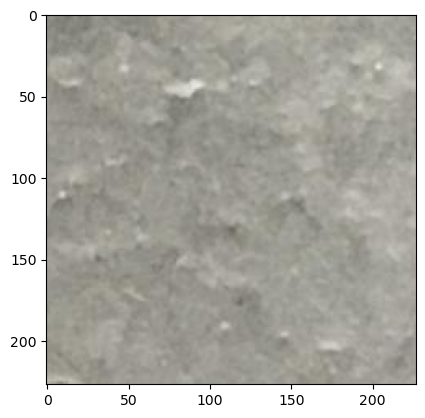

In [9]:
plt.imshow(image_data)

Now that we are familiar with the process of reading in an image data, let's loop through all the image in the *./Negative* directory and read them all in and save them in the list **negative_images**. We will also time it to see how long it takes to read in all the images.


%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('./Negative/{}'.format(image_name))
        negative_images.append(image_data)
    
negative_images = np.array(negative_images)

Oops! The **KERNEL DIED** due to an out-of-memory error. Since the kernel died, you may have to run the above cell to load the libraries and packages again.

Loading images into memory is definitely not the right approach when working with images as you can hit your limit on memory and other resources fairly quickly. Therefore, let's repeat the previous process but let's save the paths to the images in a variable instead of loading and saving the images themselves.


So instead of using **os.scandir**, we will use **os.listdir**.


In [10]:
negative_images = os.listdir('./Negative')
negative_images

['15898.jpg',
 '16961.jpg',
 '12220.jpg',
 '00764.jpg',
 '09405.jpg',
 '13172.jpg',
 '13577.jpg',
 '00176.jpg',
 '16914.jpg',
 '05296.jpg',
 '10551.jpg',
 '11901.jpg',
 '03412.jpg',
 '18304.jpg',
 '16539.jpg',
 '02655.jpg',
 '07472.jpg',
 '15563.jpg',
 '07321.jpg',
 '10735.jpg',
 '16329.jpg',
 '08749.jpg',
 '15376.jpg',
 '11541.jpg',
 '10070.jpg',
 '13752.jpg',
 '10833.jpg',
 '11988.jpg',
 '16038.jpg',
 '03988.jpg',
 '13375.jpg',
 '10410.jpg',
 '11393.jpg',
 '15839.jpg',
 '11989.jpg',
 '15285.jpg',
 '00300.jpg',
 '04884.jpg',
 '18925.jpg',
 '13893.jpg',
 '02685.jpg',
 '01684.jpg',
 '09474.jpg',
 '15407.jpg',
 '12070.jpg',
 '03175.jpg',
 '08195.jpg',
 '02696.jpg',
 '06056.jpg',
 '05491.jpg',
 '02532.jpg',
 '04880.jpg',
 '08841.jpg',
 '16082.jpg',
 '12675.jpg',
 '11188.jpg',
 '00054.jpg',
 '14035.jpg',
 '08119.jpg',
 '18083.jpg',
 '00607.jpg',
 '17139.jpg',
 '07313.jpg',
 '15278.jpg',
 '07149.jpg',
 '15458.jpg',
 '05978.jpg',
 '03347.jpg',
 '02692.jpg',
 '09183.jpg',
 '05033.jpg',
 '1546

Notice how the images are not sorted, so let's call the <code>sort</code> method to sort the images.


In [11]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Before we can show an image, we need to open it, which we can do using the **Image** module in the **PIL** library. So to open the first image, we run the following:


In [12]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

Then to view the image, you can simply run:


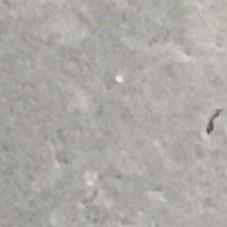

In [13]:
image_data

or use the <code>imshow</code> method as follows:


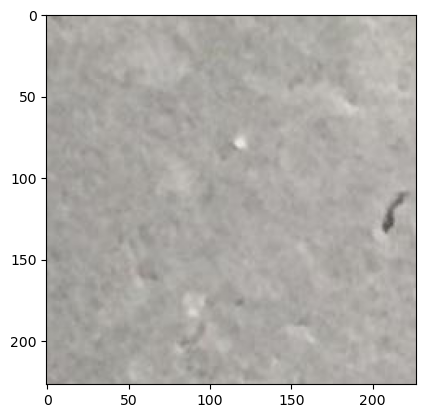

In [14]:
plt.imshow(image_data)

Let's loop through all the images in the <code>./Negative</code> directory and add save their paths.


In [15]:
negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./Negative/00001.jpg',
 './Negative/00002.jpg',
 './Negative/00003.jpg',
 './Negative/00004.jpg',
 './Negative/00005.jpg',
 './Negative/00006.jpg',
 './Negative/00007.jpg',
 './Negative/00008.jpg',
 './Negative/00009.jpg',
 './Negative/00010.jpg',
 './Negative/00011.jpg',
 './Negative/00012.jpg',
 './Negative/00013.jpg',
 './Negative/00014.jpg',
 './Negative/00015.jpg',
 './Negative/00016.jpg',
 './Negative/00017.jpg',
 './Negative/00018.jpg',
 './Negative/00019.jpg',
 './Negative/00020.jpg',
 './Negative/00021.jpg',
 './Negative/00022.jpg',
 './Negative/00023.jpg',
 './Negative/00024.jpg',
 './Negative/00025.jpg',
 './Negative/00026.jpg',
 './Negative/00027.jpg',
 './Negative/00028.jpg',
 './Negative/00029.jpg',
 './Negative/00030.jpg',
 './Negative/00031.jpg',
 './Negative/00032.jpg',
 './Negative/00033.jpg',
 './Negative/00034.jpg',
 './Negative/00035.jpg',
 './Negative/00036.jpg',
 './Negative/00037.jpg',
 './Negative/00038.jpg',
 './Negative/00039.jpg',
 './Negative/00040.jpg',


Let's check how many images with no cracks exist in the dataset.


In [16]:
len(negative_images_dir)

20000

### Question: Show the next four images.


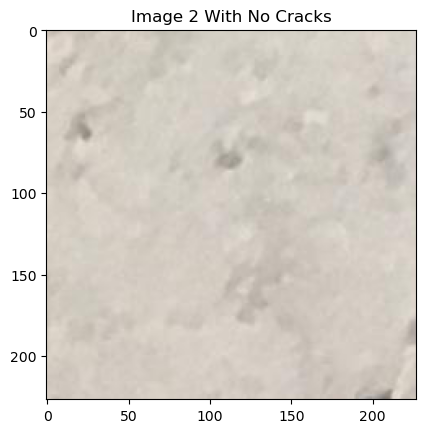

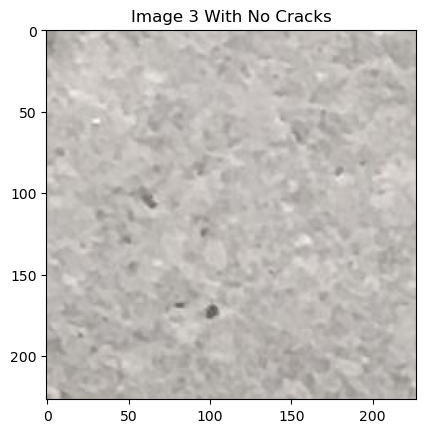

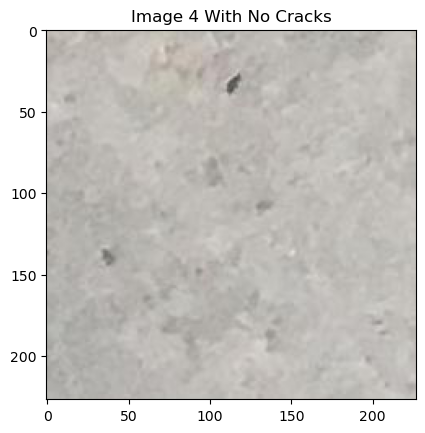

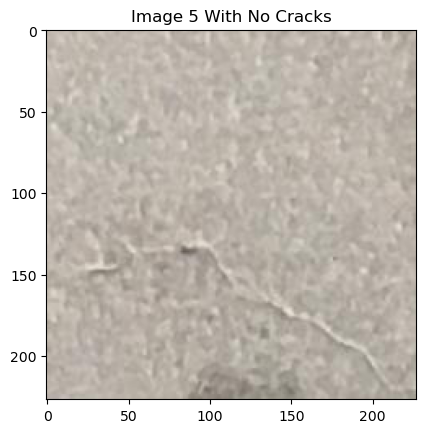

In [17]:
for i in range(1, 5):
    image_data = Image.open('./Negative/{}'.format(negative_images[i]))
    plt.imshow(image_data)
    plt.title(f"Image {i + 1} With No Cracks")
    plt.show()

**Your turn**: Save the paths to all the images in the *./Positive* directory in a list called **positive_images_dir**. Make sure to sort the paths.


In [18]:
positive_images = sorted(os.listdir('./Positive'))
positive_images_dir = ['./Positive/{}'.format(image) for image in positive_images]
positive_images_dir

['./Positive/00001.jpg',
 './Positive/00002.jpg',
 './Positive/00003.jpg',
 './Positive/00004.jpg',
 './Positive/00005.jpg',
 './Positive/00006.jpg',
 './Positive/00007.jpg',
 './Positive/00008.jpg',
 './Positive/00009.jpg',
 './Positive/00010.jpg',
 './Positive/00011.jpg',
 './Positive/00012.jpg',
 './Positive/00013.jpg',
 './Positive/00014.jpg',
 './Positive/00015.jpg',
 './Positive/00016.jpg',
 './Positive/00017.jpg',
 './Positive/00018.jpg',
 './Positive/00019.jpg',
 './Positive/00020.jpg',
 './Positive/00021.jpg',
 './Positive/00022.jpg',
 './Positive/00023.jpg',
 './Positive/00024.jpg',
 './Positive/00025.jpg',
 './Positive/00026.jpg',
 './Positive/00027.jpg',
 './Positive/00028.jpg',
 './Positive/00029.jpg',
 './Positive/00030.jpg',
 './Positive/00031.jpg',
 './Positive/00032.jpg',
 './Positive/00033.jpg',
 './Positive/00034.jpg',
 './Positive/00035.jpg',
 './Positive/00036.jpg',
 './Positive/00037.jpg',
 './Positive/00038.jpg',
 './Positive/00039.jpg',
 './Positive/00040.jpg',


### Question: How many images of cracked concrete exist in the *./Positive* directory?


In [19]:
len(positive_images_dir)

20000

### Question: Show the first four images with cracked concrete.


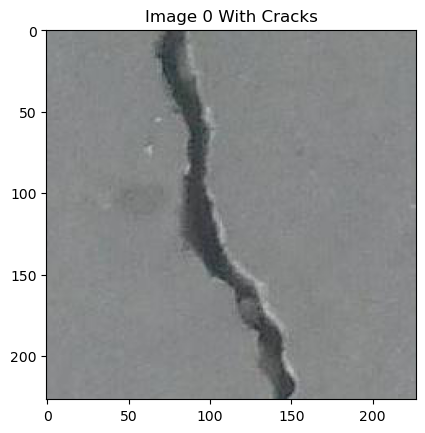

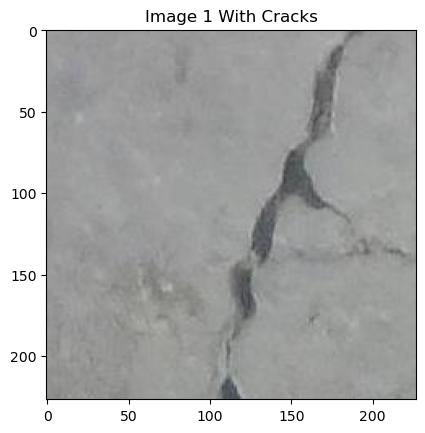

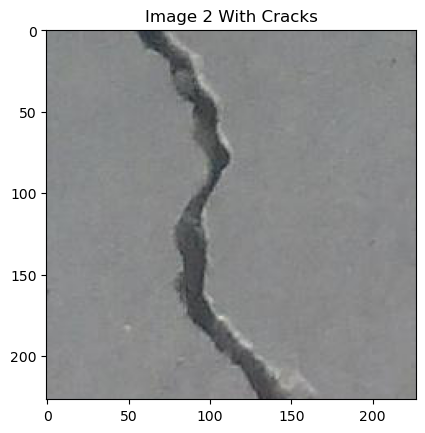

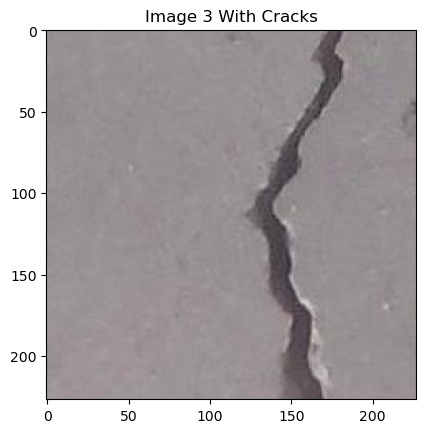

In [20]:
for i in range(0, 4):
    image_data = Image.open('./Positive/{}'.format(positive_images[i]))
    plt.imshow(image_data)
    plt.title(f"Image {i} With Cracks")
    plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson. I hope you found this lab interesting and educational.


This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week1_LAB1).


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


 [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01). Ph.D., is a data scientist in the Digital Business Group at IBM Canada. Alex has been intensively involved in many exciting data science projects such as designing a smart system that could detect the onset of dementia in older adults using longitudinal trajectories of walking speed and home activity. Before joining IBM, Alex worked as a data scientist at Datascope Analytics, a data science consulting firm in Chicago, IL, where he designed solutions and products using a human-centred, data-driven approach. Alex received his Ph.D. in Biomedical Engineering from the University of Toronto.



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-18  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01).
